<a href="https://colab.research.google.com/github/jmerceron/AI-Activity/blob/main/Julien_Handwritten_Digit_Recognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy import unique, argmax
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# loading the MNIST dataset
(x_train,y_train), (x_test,y_test) = load_data()
# reshaping the training and testing Data
x_train = x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# normalize the values of pixels of images
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

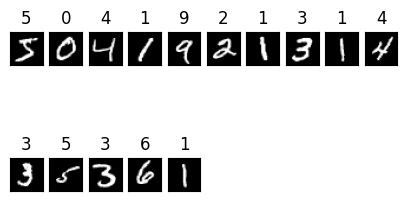

In [ ]:
fig = plt.figure(figsize=(5,3))
for i in range(15):
 ax = fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
 ax.imshow(np.squeeze(x_train[i]),cmap='gray')
 ax.set_title(y_train[i])


In [ ]:
# determine the shape of the input image
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [ ]:
# defining the model !!!
model = Sequential()
model.add(Conv2D(32,(3,3), activation='relu', input_shape=img_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0,5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 48)          0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 48)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1200)             

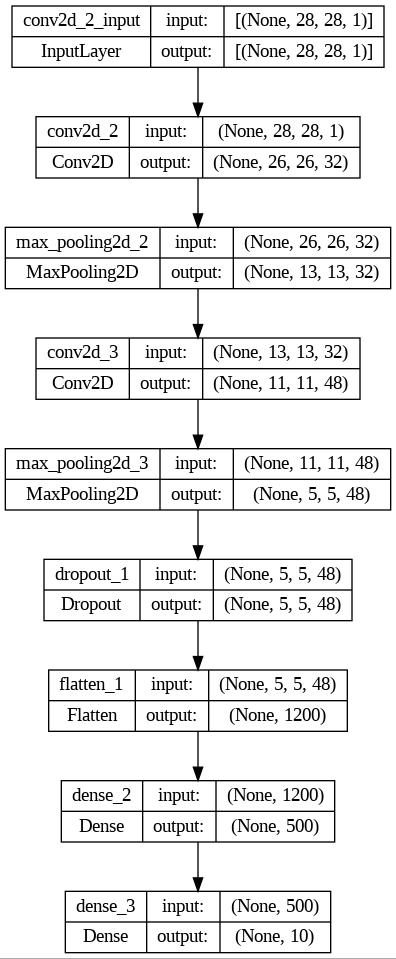

In [ ]:
plot_model(model, 'model.jpg', show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x = model.fit(x_train,y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 41s - loss: 0.9746 - accuracy: 0.9341 - val_loss: 0.0693 - val_accuracy: 0.9790 - 41s/epoch - 98ms/step
Epoch 2/10
422/422 - 42s - loss: 0.0483 - accuracy: 0.9847 - val_loss: 0.0625 - val_accuracy: 0.9808 - 42s/epoch - 99ms/step
Epoch 3/10
422/422 - 45s - loss: 0.0300 - accuracy: 0.9898 - val_loss: 0.0516 - val_accuracy: 0.9865 - 45s/epoch - 107ms/step
Epoch 4/10
422/422 - 37s - loss: 0.0207 - accuracy: 0.9931 - val_loss: 0.0545 - val_accuracy: 0.9862 - 37s/epoch - 89ms/step
Epoch 5/10
422/422 - 35s - loss: 0.0154 - accuracy: 0.9948 - val_loss: 0.0779 - val_accuracy: 0.9838 - 35s/epoch - 83ms/step
Epoch 6/10
422/422 - 36s - loss: 0.0195 - accuracy: 0.9934 - val_loss: 0.0661 - val_accuracy: 0.9865 - 36s/epoch - 85ms/step
Epoch 7/10
422/422 - 35s - loss: 0.0163 - accuracy: 0.9943 - val_loss: 0.0738 - val_accuracy: 0.9842 - 35s/epoch - 83ms/step
Epoch 8/10
422/422 - 36s - loss: 0.0129 - accuracy: 0.9960 - val_loss: 0.0616 - val_accuracy: 0.9875 - 36s/epoch - 85ms/step

In [ ]:
loss, accuracy = model.evaluate(x_test,y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 98.29000234603882
